In [1]:
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = keras.datasets.mnist.load_data()
(X_train, y_train), (X_test, y_test) = df

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train = keras.utils.normalize(X_train, axis=1)
X_test = keras.utils.normalize(X_test, axis=1)

In [4]:
X_train, X_val = X_train[:50000], X_train[50000:]
y_train, y_val = y_train[:50000],y_train[50000:]

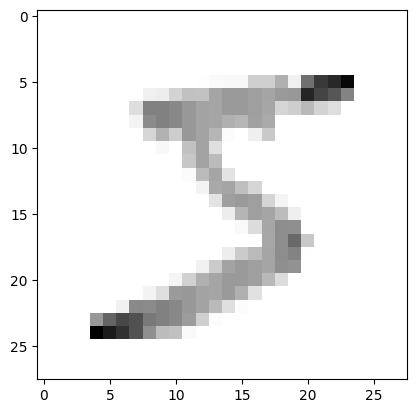

In [5]:
plt.imshow(X_train[0], cmap="binary")

In [6]:
len(X_train[0].ravel())

784

In [7]:
def relu(X, clip_value=None):
  output = np.maximum(0, X)
  if clip_value == None:
    return output
  else:
    return np.minimum(X, clip_value)

def relu_derivative(X):
  return np.where(X > 0, 1, 0)

def prob(X):
  return X / sum(X)

In [8]:
input_size = 784
hidden_size_1 = 100
hidden_size_2 = 100
output_size = 10

In [28]:
w1 = np.random.rand(input_size, hidden_size_1)
b1 = np.random.rand(1, hidden_size_1)
w2 = np.random.rand(hidden_size_1, hidden_size_2)
b2 = np.random.rand(1, hidden_size_2)
w3 = np.random.rand(hidden_size_2, output_size)
b3 = np.random.rand(1, output_size)

wb = {"w1": w1, "b1": b1, "w2": w2, "b2": b2, "w3": w3, "b3": b3}

In [10]:
def forward(X, wb, clip_value=None, return_output=True):
  X = np.array([x.ravel() for x in X])
  z1 = np.matmul(X, wb["w1"]) + wb["b1"]
  a1 = relu(z1, clip_value)
  z2 = np.matmul(a1, wb["w2"]) + wb["b2"]
  a2 = relu(z2, clip_value)
  #print(a2)
  z3 = np.matmul(a2, wb["w3"]) + wb["b3"]
  a3 = prob(z3)

  if return_output:
    return a3
  else:
    return z1, z2, z3, a1, a2, a3

In [11]:
def predict(X):
  return np.array([np.argmax(y) for y in forward(X, wb)])

def accuracy(X, y_true):
  y_pred = predict(X)
  return np.sum(np.where(y_pred == y_true, 1, 0)) / len(y_pred)

In [12]:
def backpropagation(X, y, wb, learning_rate, clip_value):
  X = np.array([x.ravel() for x in X])
  y = np.array([[1 if i == _y else 0 for i in range(10)] for _y in y])
  z1, z2, z3, a1, a2, a3 = forward(X, wb, clip_value, False)
  error = a3 - y

  d_w3 = np.matmul(a2.T, error)
  d_b3 = np.sum(error, axis=0, keepdims=True)
  d_a2 = np.matmul(w3, error.T) * relu_derivative(z2).T

  d_w2 = np.matmul(d_a2, a1).T
  d_b2 = np.sum(d_a2, axis=1, keepdims=True).T
  d_a1 = np.matmul(w2, d_a2) * relu_derivative(z1).T

  d_w1 = np.matmul(d_a1, X).T
  d_b1 = np.sum(d_a1, axis=1, keepdims=True).T

  wb["w3"] -= d_w3 * learning_rate
  wb["b3"] -= d_b3 * learning_rate
  wb["w2"] -= d_w2 * learning_rate
  wb["b2"] -= d_b2 * learning_rate
  wb["w1"] -= d_w1 * learning_rate
  wb["b1"] -= d_b1 * learning_rate

  return wb

In [13]:
def train(X, y, wb, epochs, learning_rate, clip_value, X_val, y_val):
  for i in range(epochs):
    wb = backpropagation(X, y, wb, learning_rate, clip_value)
    training_accuracy = accuracy(X, y)
    val_accuracy = accuracy(X_val, y_val)
    print(f"Epoch: {i} Training accuracy: {round(training_accuracy, 5)} Validation accuracy: {round(val_accuracy, 5)}")

In [29]:
train(X_train, y_train, wb, 35, 0.00001, 3, X_val, y_val)

Epoch: 0 Training accuracy: 0.32386 Validation accuracy: 0.3253
Epoch: 1 Training accuracy: 0.4816 Validation accuracy: 0.4957
Epoch: 2 Training accuracy: 0.57856 Validation accuracy: 0.5991
Epoch: 3 Training accuracy: 0.63122 Validation accuracy: 0.6598
Epoch: 4 Training accuracy: 0.66162 Validation accuracy: 0.6941
Epoch: 5 Training accuracy: 0.6816 Validation accuracy: 0.715
Epoch: 6 Training accuracy: 0.69492 Validation accuracy: 0.7285
Epoch: 7 Training accuracy: 0.70506 Validation accuracy: 0.7387
Epoch: 8 Training accuracy: 0.71134 Validation accuracy: 0.7453
Epoch: 9 Training accuracy: 0.71658 Validation accuracy: 0.7492
Epoch: 10 Training accuracy: 0.71992 Validation accuracy: 0.7533
Epoch: 11 Training accuracy: 0.72376 Validation accuracy: 0.7555
Epoch: 12 Training accuracy: 0.72622 Validation accuracy: 0.7589
Epoch: 13 Training accuracy: 0.72782 Validation accuracy: 0.7603
Epoch: 14 Training accuracy: 0.72938 Validation accuracy: 0.7618
Epoch: 15 Training accuracy: 0.7308 Va

In [30]:
test_accuracy = accuracy(X_test, y_test)

In [31]:
print(test_accuracy)

0.7503
